In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import seaborn as sns
import pandas as pd
import dlsfunctions as dls
import scipy
import scipy.optimize
import scipy.integrate

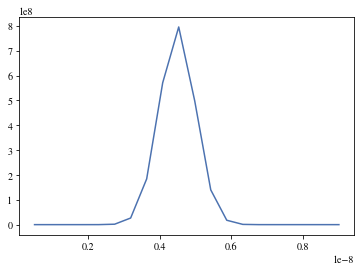

In [23]:
r_1 = 2.2439608235145855e-09    # in meters
diameter_1 = r_1 * 2
sigma_1 = 5e-10
c = 1
d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, diameter_1, sigma_1, c)
plt.plot(d, f_1)

In [3]:
beta = 1
# THIS PIECE WAS WHAT'S DIFFERENT
# previously I write theta_in = (f_1, beta) which creates a tuple, not good for slicing
# should use append so that both f and beta are in one array together, easier for slicing
theta_in = np.append(f_1, beta)

In [4]:
gamma_1 = dls.calc_gamma(20, c, 1e-3, 1.33, np.pi/2, 1.38e-23, 298.15, 638e-9)
time_in = np.linspace(1e-4, 1e-1, 200)
m = 20

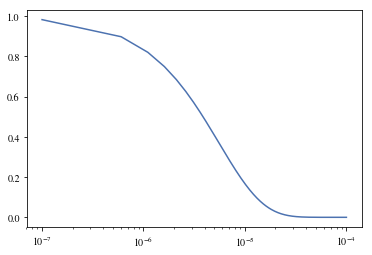

In [26]:
simulated_data_1 = dls.g2(theta_in, d, m, gamma_1, time_in*0.001)
plt.semilogx(time_in*0.001, simulated_data_1)

In [6]:
ndim = 21
nwalkers = 100
nsteps = 1800

In [7]:
start_pos = [theta_in + 1e-4*np.random.randn(ndim) for i in range(nwalkers)] 

In [8]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior, args=(d, simulated_data_1, m, gamma_1, time_in*0.001))

In [9]:
%time result = sampler.run_mcmc(start_pos, nsteps)

/usr/local/lib/python2.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/usr/local/lib/python2.7/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


CPU times: user 7min 15s, sys: 3.43 s, total: 7min 18s
Wall time: 7min 27s


In [10]:
sampler.acceptance_fraction

array([0.33833333, 0.36944444, 0.37777778, 0.33333333, 0.38      ,
       0.35277778, 0.35388889, 0.34833333, 0.35333333, 0.35333333,
       0.35166667, 0.37111111, 0.37611111, 0.35166667, 0.36166667,
       0.37555556, 0.37055556, 0.36055556, 0.36333333, 0.38444444,
       0.36222222, 0.33666667, 0.36388889, 0.36944444, 0.34111111,
       0.35888889, 0.37611111, 0.35444444, 0.35944444, 0.35666667,
       0.35611111, 0.37333333, 0.35388889, 0.345     , 0.34666667,
       0.37888889, 0.34666667, 0.36277778, 0.37944444, 0.34944444,
       0.38055556, 0.34277778, 0.33944444, 0.35611111, 0.37444444,
       0.37944444, 0.38333333, 0.34277778, 0.35388889, 0.35722222,
       0.34222222, 0.365     , 0.37555556, 0.35666667, 0.37666667,
       0.35166667, 0.35944444, 0.34722222, 0.37222222, 0.38333333,
       0.35444444, 0.34333333, 0.37111111, 0.355     , 0.36      ,
       0.36111111, 0.35333333, 0.35888889, 0.36277778, 0.35444444,
       0.36222222, 0.35333333, 0.37777778, 0.35722222, 0.35055

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


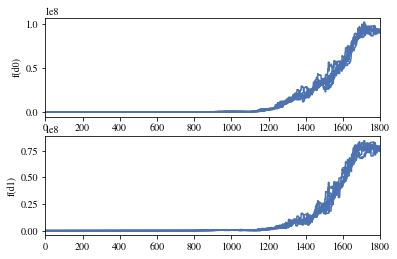

In [11]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)

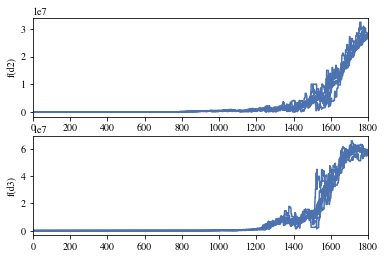

In [12]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax2, ax3) = plt.subplots(2)
ax2.set(ylabel='f(d2)')
ax3.set(ylabel='f(d3)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 2], ax=ax2)
    sns.tsplot(sampler.chain[j, :, 3], ax=ax3)

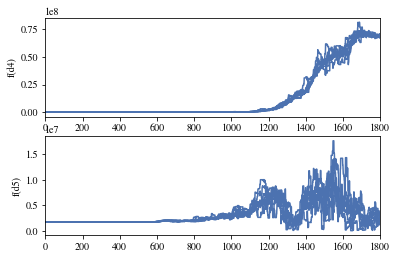

In [13]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax4, ax5) = plt.subplots(2)
ax4.set(ylabel='f(d4)')
ax5.set(ylabel='f(d5)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 4], ax=ax4)
    sns.tsplot(sampler.chain[j, :, 5], ax=ax5)

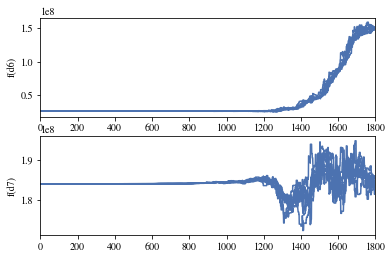

In [14]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax6, ax7) = plt.subplots(2)
ax6.set(ylabel='f(d6)')
ax7.set(ylabel='f(d7)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 6], ax=ax6)
    sns.tsplot(sampler.chain[j, :, 7], ax=ax7)

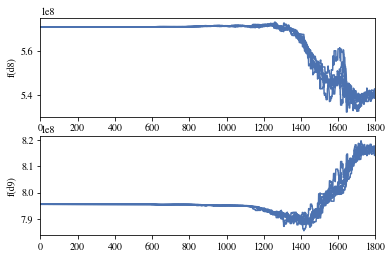

In [15]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax8, ax9) = plt.subplots(2)
ax8.set(ylabel='f(d8)')
ax9.set(ylabel='f(d9)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 8], ax=ax8)
    sns.tsplot(sampler.chain[j, :, 9], ax=ax9)

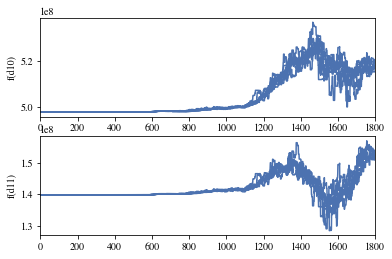

In [16]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax10, ax11) = plt.subplots(2)
ax10.set(ylabel='f(d10)')
ax11.set(ylabel='f(d11)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 10], ax=ax10)
    sns.tsplot(sampler.chain[j, :, 11], ax=ax11)

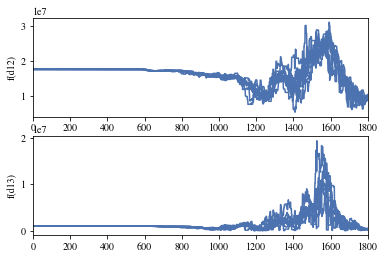

In [17]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax12, ax13) = plt.subplots(2)
ax12.set(ylabel='f(d12)')
ax13.set(ylabel='f(d13)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 12], ax=ax12)
    sns.tsplot(sampler.chain[j, :, 13], ax=ax13)

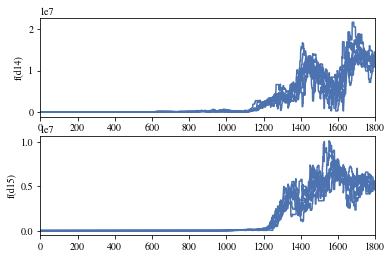

In [18]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax14, ax15) = plt.subplots(2)
ax14.set(ylabel='f(d14)')
ax15.set(ylabel='f(d15)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 14], ax=ax14)
    sns.tsplot(sampler.chain[j, :, 15], ax=ax15)

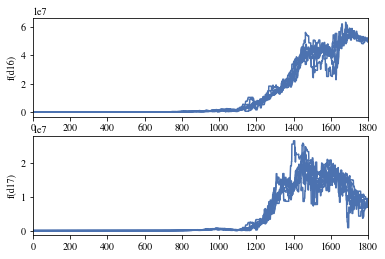

In [19]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax16, ax17) = plt.subplots(2)
ax16.set(ylabel='f(d16)')
ax17.set(ylabel='f(d17)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 16], ax=ax16)
    sns.tsplot(sampler.chain[j, :, 17], ax=ax17)

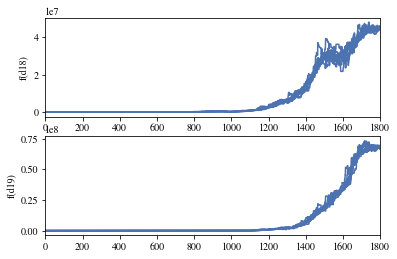

In [20]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax18, ax19) = plt.subplots(2)
ax18.set(ylabel='f(d18)')
ax19.set(ylabel='f(d19)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 18], ax=ax18)
    sns.tsplot(sampler.chain[j, :, 19], ax=ax19)

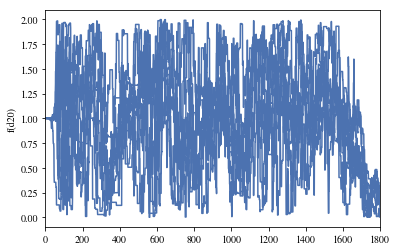

In [21]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax20) = plt.subplots(1)
ax20.set(ylabel='f(d20)')


for j in range(10):
    sns.tsplot(sampler.chain[j, :, 20], ax=ax20)


In [38]:
# prior for beta, do enzyme data
# Since it takes about 150 steps for the walkers to settle, trim the data to include only steps after 100
samples = sampler.chain[:,1500:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19], 'beta': traces[20]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [39]:
q

,beta,f(d0),f(d1),f(d10),f(d11),f(d12),f(d13),f(d14),f(d15),f(d16),...,f(d18),f(d19),f(d2),f(d3),f(d4),f(d5),f(d6),f(d7),f(d8),f(d9)
0.16,0.220982,4.276770e+07,3.462326e+07,5.139279e+08,1.369503e+08,9.807732e+06,6.282329e+05,6.095273e+06,5.013455e+06,4.147436e+07,...,2.999819e+07,2.789623e+07,5.021440e+06,2.259623e+07,5.134158e+07,1.932572e+06,6.765449e+07,1.835364e+08,5.390906e+08,7.984259e+08
0.50,0.595298,7.538616e+07,6.700059e+07,5.171022e+08,1.430117e+08,1.714819e+07,2.178652e+06,1.065271e+07,5.744198e+06,4.913414e+07,...,3.713367e+07,5.203830e+07,1.417611e+07,4.746621e+07,6.514459e+07,3.461770e+06,1.130810e+08,1.861151e+08,5.419807e+08,8.075864e+08
0.84,1.145108,9.275286e+07,7.921017e+07,5.203426e+08,1.520090e+08,2.429879e+07,8.673658e+06,1.356369e+07,6.785501e+06,5.305198e+07,...,4.413142e+07,6.770680e+07,2.459576e+07,5.959668e+07,7.062950e+07,7.635804e+06,1.467113e+08,1.894200e+08,5.479612e+08,8.155855e+08


In [33]:
fifty_q = np.zeros(20)
fifty_q[0] = 7.5386e7
fifty_q[1] = 6.7e7
fifty_q[2] = 1.4176e7
fifty_q[3] = 4.7466e7
fifty_q[4] = 6.5144e7
fifty_q[5] = 3.4617e6
fifty_q[6] = 1.13e8
fifty_q[7] = 1.8611e8
fifty_q[8] = 5.4198e8
fifty_q[9] = 8.076e8
fifty_q[10] = 5.171e8
fifty_q[11] = 1.43012e8
fifty_q[12] = 1.715e7
fifty_q[13] = 2.179e6
fifty_q[14] = 1.065e7
fifty_q[15] = 5.744e6
fifty_q[16] = 4.91e7
fifty_q[17] = 1.386e7
fifty_q[18] = 3.7134e7
fifty_q[19] = 5.204e7

Text(0,0.5,'Frequency')

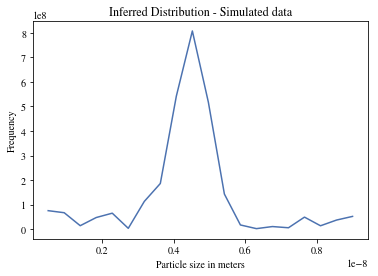

In [36]:
plt.plot(d,fifty_q)
plt.title('Inferred Distribution - from simulated data')
plt.xlabel('Particle size in meters')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

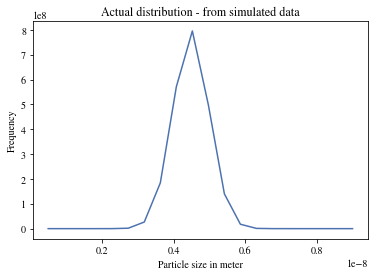

In [37]:
plt.plot(d, f_1)
plt.title('Actual distribution - from simulated data')
plt.xlabel('Particle size in meter')
plt.ylabel('Frequency')

In [41]:
inferred_beta = 0.6
theta_inferred = np.append(fifty_q, inferred_beta)

Text(0,0.5,'Intensity')

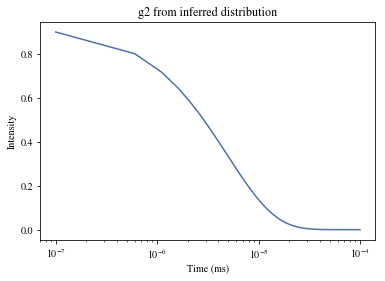

In [45]:
# Residuals
g2_from_inferred_distribution = dls.g2(theta_inferred, d, 20, gamma_1, time_in*0.001)
plt.semilogx(time_in*0.001, g2_from_inferred_distribution)
plt.title('g2 from inferred distribution')
plt.xlabel('Time (ms)')
plt.ylabel('Intensity')

Text(0,0.5,'Residuals')

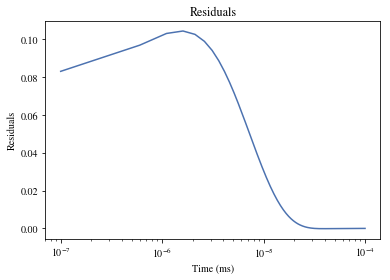

In [46]:
plt.semilogx(time_in*.001, simulated_data_1 - g2_from_inferred_distribution)
plt.title('Residuals')
plt.xlabel('Time (ms)')
plt.ylabel('Residuals')

In [51]:
parameter_samples_firstthird = pd.DataFrame({'f(d0)':traces[0], 'f(d1)':traces[1], 'f(d2)':traces[2], 'f(d3)':traces[3]})


Text(0.5,1,'Pair Plots for the first 4 inferred paramters')

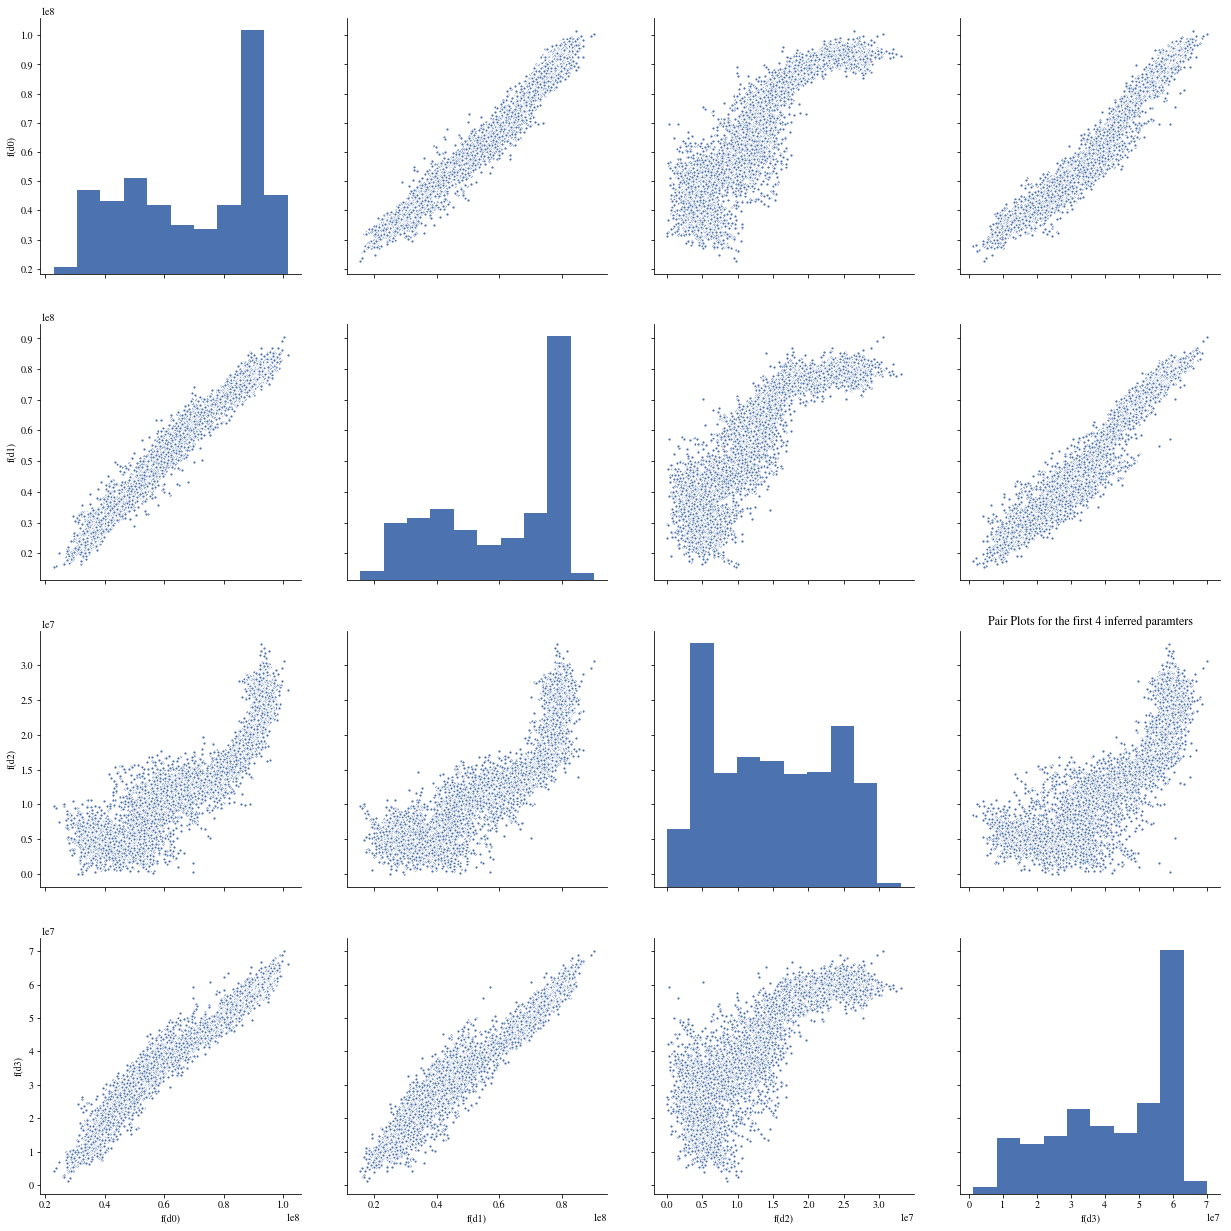

In [56]:
sns.pairplot(parameter_samples_firstthird, markers='.', size=4.3)
plt.tight_layout()
plt.title('Pair Plots for the first 4 inferred paramters')

In [53]:
parameter_samples_secondthird = pd.DataFrame({'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)':traces[6], 'f(d7)': traces[7]})

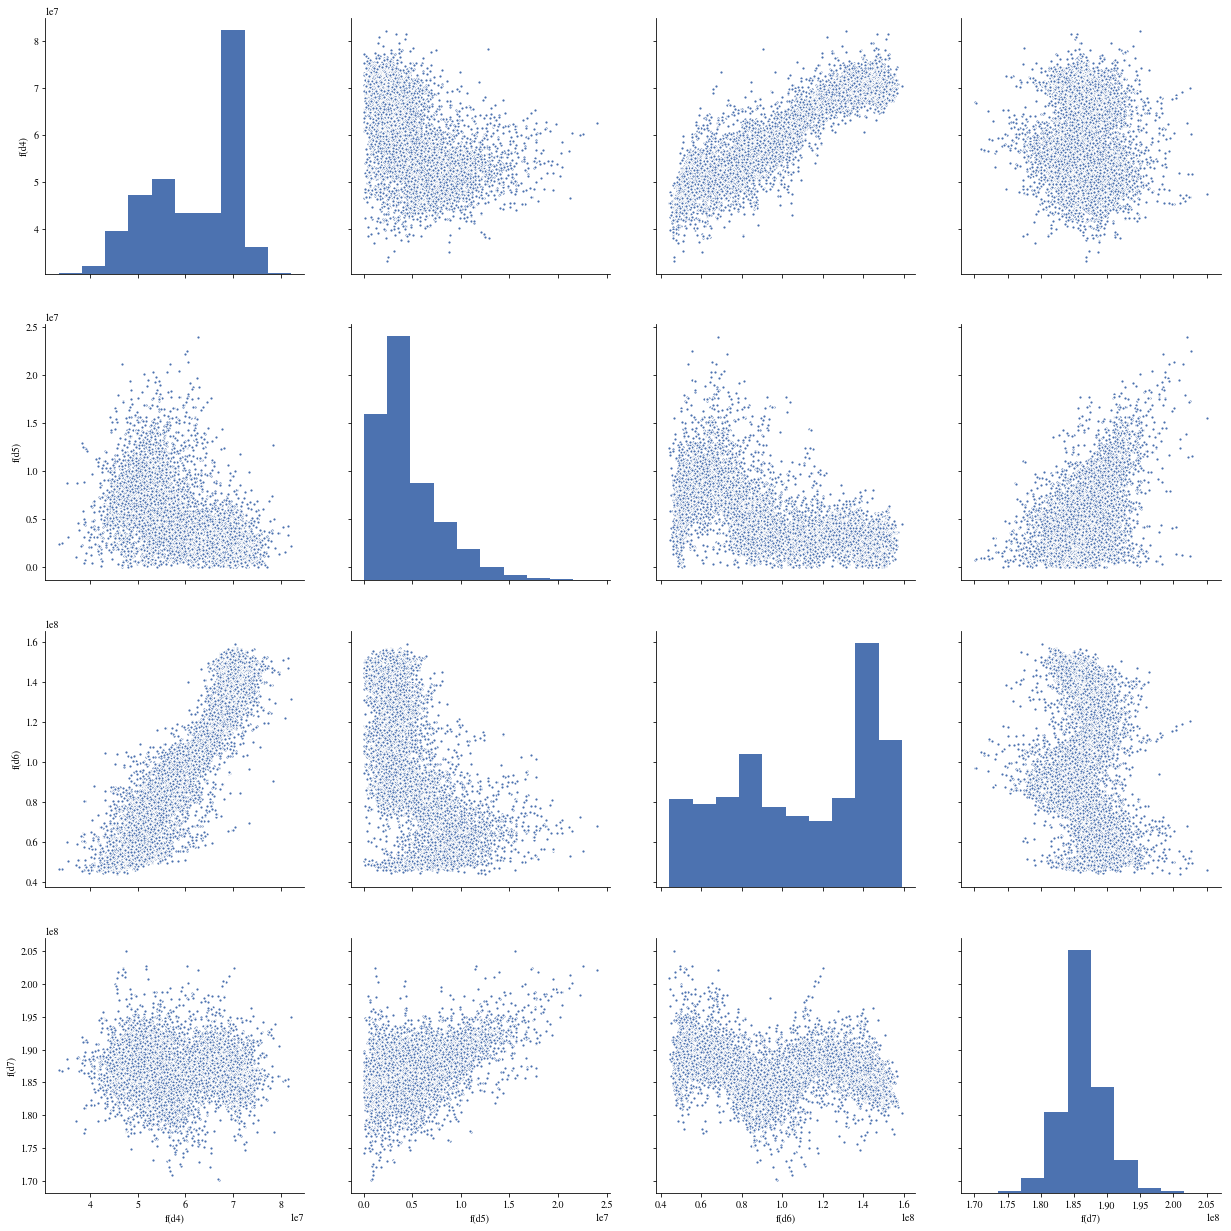

In [55]:
sns.pairplot(parameter_samples_secondthird, markers='.', size=4.3)
plt.tight_layout()